<a href="https://colab.research.google.com/github/abiyyuraihan/abiyyuraihan/blob/main/problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : MUHAMMAD ABIYYU RAIHAN

NIM : 2702330262


Problem 2

Adjusted value of p: 1937.0139340176997
Adjusted value of q: 0.01534031593981858


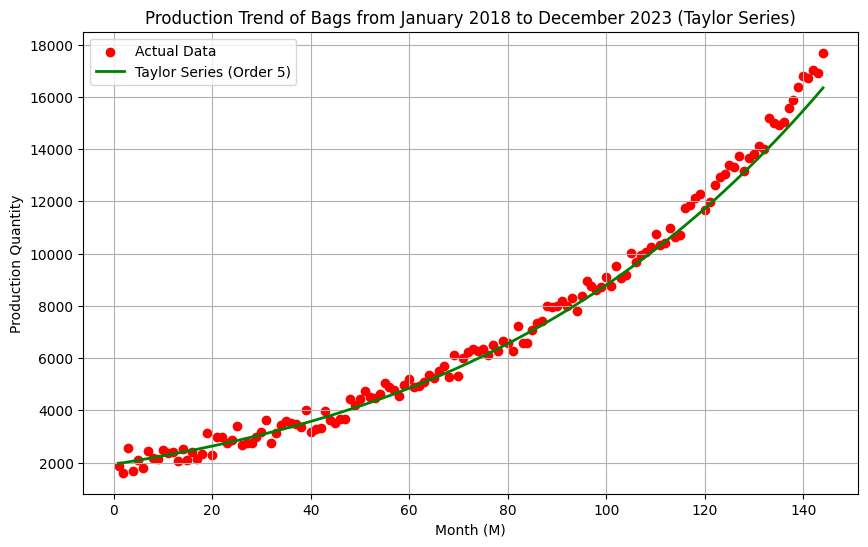

Taylor Series Results (Order 5):
   Month (M)  Taylor Series Prediction
0          1               1966.957424
1          2               1997.363797
2          3               2028.240207
3          4               2059.593915
4          5               2091.432289
5          6               2123.762803
6          7               2156.593041
7          8               2189.930693
8          9               2223.783554
9         10               2258.159530


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data produksi bulanan tas
produksi_tas = [1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747,
                2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688,
                3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110,
                5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008,
                8313, 7791, 8368, 8933, 8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318, 10393, 10986, 10635,
                10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018,
                14917, 15046, 15556, 15893, 16388, 16782, 16716, 17033, 16896, 17689]

# Exponential function
def fungsi_eksponensial(m, p, q):
    return p * np.exp(q * m)

# Taylor series approximation of the exponential function e^(qx) around M = 0
def aproksimasi_taylor(m, p, q, orde):
    aproksimasi = np.ones_like(m, dtype=np.float64) * p
    suku = p
    for n in range(1, orde):
        suku *= q * m / n
        aproksimasi += suku
    return aproksimasi

# Calculate parameters by fitting to actual data
nilai_m = np.arange(1, len(produksi_tas) + 1)
nilai_y_aktual = np.array(produksi_tas)

# Use least squares method to fit the values of p and q
q_fit, p_fit_log = np.polyfit(nilai_m, np.log(nilai_y_aktual), 1)
p_fit = np.exp(p_fit_log)

# Print adjusted values of p and q
print(f"Adjusted value of p: {p_fit}")
print(f"Adjusted value of q: {q_fit}")

# Taylor series with adjusted parameters
order = 5  # Taylor series up to the 5th term
taylor_series_values = aproksimasi_taylor(nilai_m, p_fit, q_fit, order)

# Visualize original data and approximation using Taylor series
plt.figure(figsize=(10, 6))
plt.scatter(nilai_m, nilai_y_aktual, color='red', label='Actual Data')
plt.plot(nilai_m, taylor_series_values, color='green', linestyle='-', linewidth=2, label=f'Taylor Series (Order {order})')
plt.title('Production Trend of Bags from January 2018 to December 2023 (Taylor Series)')
plt.xlabel('Month (M)')
plt.ylabel('Production Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Display Taylor series results
df = pd.DataFrame({
    'Month (M)': nilai_m,
    'Taylor Series Prediction': taylor_series_values
})
print("Taylor Series Results (Order {}):".format(order))
print(df.head(10))  # Display the first 10 rows

